<a href="https://colab.research.google.com/github/AmyW418/Fashion-MNIST-CNN/blob/main/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Train and predict a CNN model for Fashion MNIST

In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.python.keras.models import Sequential

In [115]:
#load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(xtrain, ytrain), (xval, yval) = fashion_mnist.load_data()
xtest = xval[8000:]
ytest = yval[8000:]
xval = xval[:8000]
yval = yval[:8000]
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape, xtest.shape, ytest.shape)

(60000, 28, 28) (60000,) (8000, 28, 28) (8000,) (2000, 28, 28) (2000,)


In [116]:
# dictionary to match an int label to its actual string label
item_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

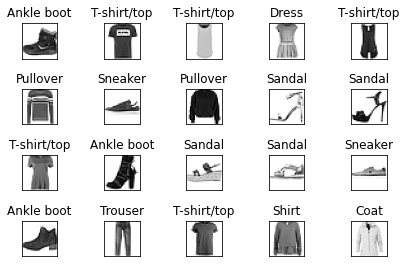

In [117]:
# show the first 20 images in train along with their respecive labels
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(xtrain[i], cmap=('Greys'))
  plt.title("{}".format(item_labels[ytrain[i]]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [118]:
# one hot encode the labels for CNN
num_labels = 10
ytrain = keras.utils.to_categorical(ytrain, num_labels)
yval = keras.utils.to_categorical(yval, num_labels)
ytest = keras.utils.to_categorical(ytest, num_labels)

# change from int to float and /255.0 to standardize
xtrain = xtrain.astype('float32') / 255.0
xval = xval.astype('float32') / 255.0
xtest = xtest.astype('float32') / 255.0

# Reshape it so it is like a "single line" of bits of the image for CNN input
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1))
xval = np.reshape(xval, (xval.shape[0], xval.shape[1], xval.shape[2], 1))
xtest= np.reshape(xtest, (xtest.shape[0], xtest.shape[1], xtest.shape[2], 1))
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape, xtest.shape, ytest.shape)

(60000, 28, 28, 1) (60000, 10) (8000, 28, 28, 1) (8000, 10) (2000, 28, 28, 1) (2000, 10)


In [119]:
# Model 1 - basic CNN model, uses three Conv2D layers, MaxPooling in between each, and two Dense layer at the end
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (2, 2), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (2, 2), activation='relu'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [120]:
# Compile and fit model 1
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
results1 = model1.fit(xtrain, ytrain, batch_size= 100, epochs = 20, validation_data=(xval, yval))

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.4824 - accuracy: 0.8256 - val_loss: 0.3756 - val_accuracy: 0.8622
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3017 - accuracy: 0.8903 - val_loss: 0.3035 - val_accuracy: 0.8888
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2567 - accuracy: 0.9042 - val_loss: 0.2739 - val_accuracy: 0.9000
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2277 - accuracy: 0.9161 - val_loss: 0.2579 - val_accuracy: 0.9089
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2046 - accuracy: 0.9245 - val_loss: 0.2452 - val_accuracy: 0.9126
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1819 - accuracy: 0.9322 - val_loss: 0.2764 - val_accuracy: 0.8989
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1657 - accuracy: 0.9385 - val_loss: 0.2481 - val_accuracy: 0.9144
Epoch 

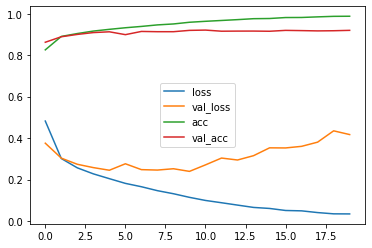

In [121]:
# Plot loss and accuracy functions for Model 1
plt.plot(results1.history['loss'], label='loss')
plt.plot(results1.history['val_loss'], label='val_loss')
plt.plot(results1.history['accuracy'], label='acc')
plt.plot(results1.history['val_accuracy'], label='val_acc')
plt.legend()

In [122]:
# Get the loss and accuracy of validation data for model 1
score = model1.evaluate(xval, yval, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.4171673059463501
Val accuracy: 0.9196249842643738


In [123]:
# Get the loss and accuracy of test data for model 1
score2 = model1.evaluate(xtest, ytest, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.339312344789505
Test accuracy: 0.925000011920929


In [124]:
model1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 5, 5, 128)         32896     
_________________________________________________________________
flatten_20 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)             

In [125]:
# While building model 1, tested multiple different numbers for kernel size, dense layer size, batch size and number or epochs
# Model worked better for larger dense layer sizes, but the amount of total params was extremely big
# Just based on accuracy the current numbers seem to work the best
# From plot for model 1, we can see that model 1 over fits the training data
# The loss function for validation data starts increasing and differs a lot from training loss function
# For model 2, Dropout is used to fix the over fitting

In [126]:
# Model 2 - Same layers as model 1 but with added Dropout Layers
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (2, 2), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (2, 2), activation='relu'))
model2.add(Flatten())
model2.add(Dropout(0.15))
model2.add(Dropout(0.25))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.30))
model2.add(Dropout(0.30))
model2.add(Dense(10, activation='softmax'))

In [127]:
# compile model 2
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
results2 = model2.fit(xtrain, ytrain, batch_size= 100, epochs = 20, validation_data=(xval, yval))

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.6028 - accuracy: 0.7822 - val_loss: 0.3864 - val_accuracy: 0.8593
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3856 - accuracy: 0.8612 - val_loss: 0.3205 - val_accuracy: 0.8849
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3338 - accuracy: 0.8800 - val_loss: 0.2853 - val_accuracy: 0.8999
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3010 - accuracy: 0.8904 - val_loss: 0.2687 - val_accuracy: 0.9029
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2830 - accuracy: 0.8977 - val_loss: 0.2667 - val_accuracy: 0.9039
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2642 - accuracy: 0.9040 - val_loss: 0.2566 - val_accuracy: 0.9045
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2511 - accuracy: 0.9095 - val_loss: 0.2509 - val_accuracy: 0.9082
Epoch 

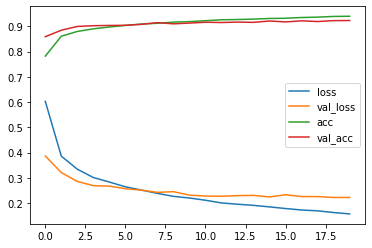

In [128]:
# plot loss and accuracy functions for model 2
plt.plot(results2.history['loss'], label='loss')
plt.plot(results2.history['val_loss'], label='val_loss')
plt.plot(results2.history['accuracy'], label='acc')
plt.plot(results2.history['val_accuracy'], label='val_acc')
plt.legend()

In [129]:
# Get the loss and accuracy of validation data for model 2
score = model2.evaluate(xval, yval, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.22190885245800018
Val accuracy: 0.9233750104904175


In [130]:
# Get the loss and accuracy of test data for model 2
score2 = model2.evaluate(xtest, ytest, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.19820047914981842
Test accuracy: 0.9334999918937683


In [106]:
model2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 5, 5, 128)         32896     
_________________________________________________________________
flatten_19 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 3200)            

In [ ]:
# Tried multiple different layers and p values for dropout. Current numbers seem to work the best.
# As seen from the plot of the loss and accuracy functions, the validation loss function is no longer growing like crazy
# The accuracy of the model on validation data has also increased by 1%, also showing less overfitting

In [ ]:
# I had also created a model 3 to test Batch Normalization Layer. 
# Combining Batch Normalization with model 2 and model 1, I did not get good results
# The loss function was very sporadic, jumping up and down, and so I got rid of it

# I also tried compiling with SGD instead of Adam. Accuracy decreased to around 86%.

In [131]:
# Get predicted array from model and get indexes of the ones that were labeled incorrectly by the model
predicted_test = np.argmax(model2.predict(xtest), axis=-1)
ytest = np.argmax(ytest, axis=1) # reverse to_categorical / change one hot encoding back to just and integer
incorrect = np.nonzero(predicted_test!=ytest)[0] 

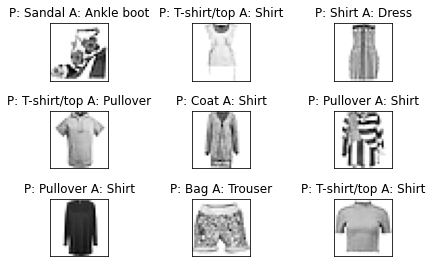

In [133]:
# randomly print out nine incorrectly labeled images along with theiir predicted labels and actual labels
for i in range(9):
  index = np.random.choice(incorrect)
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(xtest[index].reshape(28, 28), cmap=('Greys'))
  plt.title('P: %s A: %s' % (item_labels[predicted_test[index]], item_labels[ytest[index]]));
  plt.xticks([])
  plt.yticks([])
plt.show()